In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data =pd.get_dummies(data)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
User ID,1.000000,-0.000721,0.071097,0.007120,0.025249,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.025249,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.025249,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


In [ ]:
y = data['Purchased']
X = data.drop(['User ID','Purchased'],axis =1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train , y_test =train_test_split(X,y ,test_size=0.30 ,random_state =15 )

In [ ]:
X_train.shape

(280, 4)

In [ ]:
X_test.shape

(120, 4)

In [ ]:
y_train.shape

(280,)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [ ]:
y_test.value_counts()

0    79
1    41
Name: Purchased, dtype: int64

In [ ]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

confusion_matrix(y_test,y_predict)

array([[79,  0],
       [41,  0]])

In [ ]:
print('Accuracy is', accuracy_score(y_test, y_predict))
print('Recall is', recall_score(y_test, y_predict))
print('f1 score is', f1_score(y_test,y_predict))

Accuracy is 0.6583333333333333
Recall is 0.0
f1 score is 0.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors =np.arange(3,15)

for k in neighbors:
  knn_classifier = KNeighborsClassifier(n_neighbors =k ,metric ='minkowski', p=2)
  knn_classifier.fit(X_train,y_train)
  y_predict = knn_classifier.predict(X_test)
  acc = accuracy_score(y_test,y_predict)
  metric_k.append(acc)


metric_k

[0.7916666666666666,
 0.8083333333333333,
 0.8666666666666667,
 0.875,
 0.8583333333333333,
 0.85,
 0.85,
 0.8666666666666667,
 0.8416666666666667,
 0.85,
 0.8416666666666667,
 0.8416666666666667]

Text(0, 0.5, 'Accuracy')

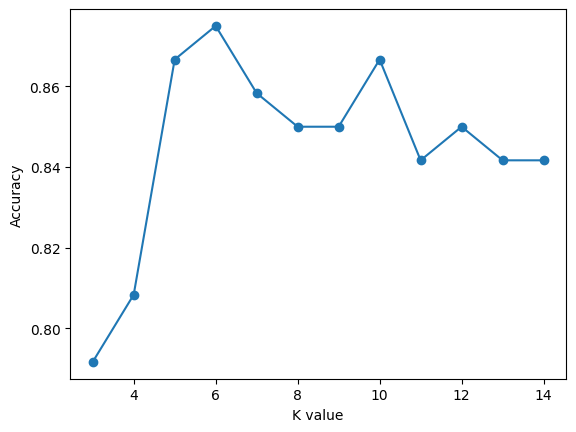

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 6 ,metric ='minkowski', p=2)
knn_classifier.fit(X_train,y_train)
y_predict = knn_classifier.predict(X_test)
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test,y_predict)

0.875


array([[75,  4],
       [11, 30]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#logistic regression after scaling
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

print('Accuracy is', accuracy_score(y_test, y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.8916666666666667


array([[74,  5],
       [ 8, 33]])

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 6 ,metric ='minkowski', p=2)
knn_classifier.fit(X_train,y_train)
y_predict = knn_classifier.predict(X_test)
print(accuracy_score(y_test,y_predict))
confusion_matrix(y_test,y_predict)

0.9166666666666666


array([[74,  5],
       [ 5, 36]])

In [ ]:
# unique_values, counts = np.unique(y_pred, return_counts=True)


In [ ]:
#svm model
from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(X_train,y_train)
svmpredict = svmclf.predict(X_test)


In [ ]:
print('accuracy is',round(accuracy_score(y_test,svmpredict),2))

accuracy is 0.88


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_predict = dt_clf.predict(X_test)

In [ ]:
accuracy_score(y_test , dt_predict)

0.8

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_predict = rf_clf.predict(X_test)
accuracy_score(y_test,rf_predict)


0.8916666666666667

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=20,
                                 max_depth=20,
                                 criterion='entropy',
                                 min_samples_split=3)
rf_clf1.fit(X_train,y_train)
rf1_predict = rf_clf1.predict(X_test)
accuracy_score(y_test,rf1_predict)

0.8916666666666667

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'criterion': ['gini', 'entropy'],  # Split criterion
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

#to find accuracy with best parameters .use above code or the below code

Test Accuracy: 0.9


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=20,
                                 max_depth=10,
                                 criterion='gini',
                                 min_samples_split=10)
rf_clf1.fit(X_train,y_train)
rf1_predict = rf_clf1.predict(X_test)
accuracy_score(y_test,rf1_predict)

0.9083333333333333